# Credit Card Dataset for Clustering - Набор данных кредитной карты для кластеризации

# Проект

Образец набора данных суммирует поведение примерно 9000 активных держателей кредитных карт за последние 6 месяцев. Файл находится на уровне клиента с 18 поведенческими переменными. Вам необходимо разработать сегментацию клиентов, чтобы определить маркетинговую стратегию на основе набора данных.

# Постановка проблемы и экономическое обоснование

Проблема, описанная в этом наборе данных, требует, чтобы мы извлекали сегменты клиентов в зависимости от их моделей поведения, представленных в наборе данных, чтобы сосредоточить маркетинговую стратегию компании на определенном сегменте.

* Маркетинг имеет решающее значение для роста и устойчивости любого бизнеса.
* Маркетологи могут помочь в создании бренда компании, привлечении клиентов, увеличении доходов и увеличении продаж.
* Одна из ключевых проблем для маркетологов - это знать своих клиентов и определять их потребности.
* Понимая клиента, маркетологи могут запустить целевую маркетинговую кампанию, адаптированную к конкретным потребностям.
* Если данные о клиентах доступны, науку о данных можно применить для сегментации рынка.
* В этом тематическом исследовании вы были наняты в качестве консультанта банка в Нью-Йорке.
* Банк располагает обширными данными о своих клиентах за последние 6 месяцев.
* Маркетинговая группа банка хочет запустить целевую рекламную маркетинговую кампанию, разделив своих клиентов как минимум на 3 отдельные группы.

# Описание данных

Ссылка на набор данных: [Kaggle link](https://www.kaggle.com/arjunbhasin2013/ccdata)

Здесь приведены элементы датасета (набор данных по кредитным картам): <br>
* CUST_ID: идентификация держателя кредитной карты (категориальная) <br>
* BALANCE: остаток на их счету для покупок <br>
* BALANCE_FREQUENCY: как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется) <br>
* PURCHASES: количество покупок, совершенных со счета <br>
* ONEOFF_PURCHASES: максимальная сумма покупки за один раз <br>
* INSTALLMENTS_PURCHASES: сумма покупки в рассрочку <br>
* CASH_ADVANCE: предоплата пользователем <br>
* PURCHASES_FREQUENCY: как часто совершаются покупки, оценка от 0 до 1 (1 = часто покупают, 0 = не часто покупают) <br>
* ONEOFF_PURCHASES_FREQUENCY: как часто покупки совершаются за один раз (1 = часто покупают, 0 = не часто покупают) <br>
* PURCHASES_INSTALLMENTS_FREQUENCY: Как часто совершаются покупки в рассрочку (1 = часто, 0 = не часто) <br>
* CASH_ADVANCE_FREQUENCY: как часто выплачивается предоплата наличными <br>
* CASH_ADVANCE_TRX: количество транзакций, совершенных с помощью "Cash in Advanced" <br>
* PURCHASES_TRX: количество совершенных покупок <br>
* CREDIT_LIMIT: Лимит кредитной карты для пользователя <br>
* PAYMENTS: сумма платежа, произведенного пользователем <br>
* MINIMUM_PAYMENTS: минимальная сумма платежей, совершаемых пользователем <br>
* PRCFULLPAYMENT: процент полной оплаты, уплаченной пользователем <br>
* TENURE: Срок действия кредитной карты для пользователя

# Цель

В этом наборе данных много функций (18 поведенческих функций). Сейчас мы выполним: <br>
* Предварительную обработка данных <br>
* Кластеризацию <br>
* Извлечение функций для улучшения кластеризации <br>
* Поэкспериментируем с различными моделями кластеризации: KMeans, Agglomerative Hierarchical, Gaussian Mixture <br>
* Выбор количества кластеров <br>
* EDA для сегментации клиентов <br>
* Завершение проекта путем предоставления маркетинговой стратегии, основанной на том, что мы узнаем из данных

In [17]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code"></form>''')

In [33]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# load the data
data = pd.read_csv('CC GENERAL.csv')

In [ ]:
# data overview
print('Data shape: ' + str(data.shape))
data.head()

Data shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Проверка данных

Сначала мы проверяем отсутствующие / поврежденные значения - они меняются на среднее значение

In [10]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We will impute these missing values with the median value.

In [11]:
# impute with median
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()
# double check
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Теперь мы отбрасываем столбец CUST_ID, а затем нормализуем входные значения с помощью StandardScaler (), когда данные будут готовы, можно будет приступать к кластеризации

In [12]:
# drop ID column
data = data.drop('CUST_ID', 1)
# normalize values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape

(8950, 17)

In [13]:
data_imputed = pd.DataFrame(data_scaled, columns=data.columns)

#  Кластеризация

## Проверка корреляции

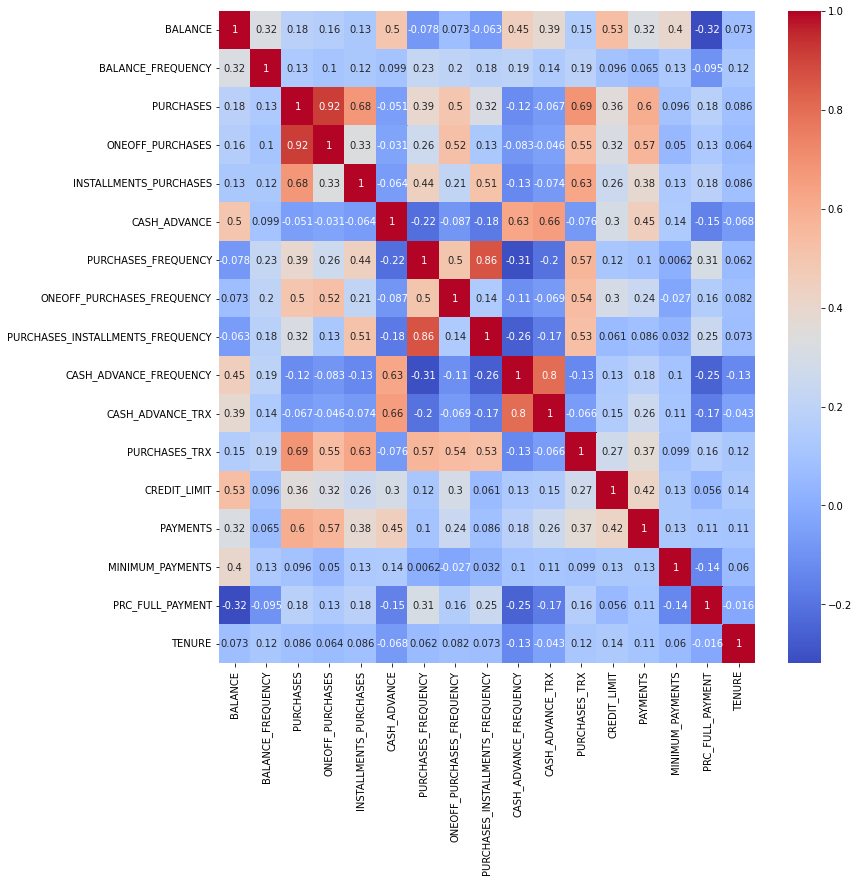

In [14]:
plt.figure(figsize = (12, 12))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', xticklabels=data_imputed.columns, yticklabels=data_imputed.columns)
plt.show()

## Кластеризация с использованием K-средних

В этом разделе мы выполним кластеризацию данных с помощью K-средних и проверим метрики кластеризации (инерция, оценки силуэтов).

### График инерции

Сначала делаем график инерции:

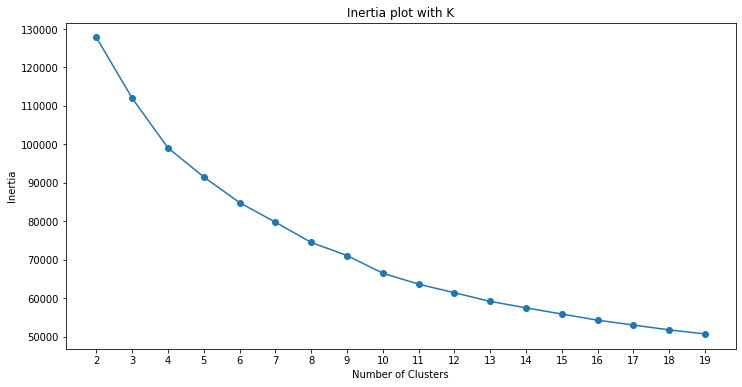

In [15]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()
inertia_plot(KMeans, data_imputed)

Используя метод, вибираем количество кластеров равным 6.

In [18]:
# Do the K-Means Clustering
set.seed(333)
cc_kmeans <- kmeans(cc_no_outlier_scale, centers = 7)

# Apply the cluster to our data
cc_no_outlier$group <- cc_kmeans$cluster

glimpse(cc_no_outlier)

# PCA
cc_pca <- PCA(X = cc_no_outlier,
              scale.unit = T, # do scaling
              quali.sup = 18, # group column
              graph = F)

# PCA + K-Means Visualization
fviz_pca_biplot(X = cc_pca,
                habillage = 18, # group column
                geom.ind = "point", # display each observations without text
                addEllipses = T)

SyntaxError: ignored

![](image_2021-12-20_22-52-01.png)

### Очки за силуэт

Анализ силуэта можно использовать для изучения разделительного расстояния между результирующими кластерами. График силуэта отображает меру того, насколько близко каждая точка в одном кластере находится к точкам в соседних кластерах, и, таким образом, обеспечивает способ визуальной оценки таких параметров, как количество кластеров. Эта мера имеет диапазон [-1, 1]. Теперь мы проверим оценки силуэтов для разного количества кластеров.

In [19]:
def silh_samp_cluster(clust,  X, start=2, stop=5, metric = 'euclidean'):
    # taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        km = clust(n_clusters = x)
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()

In [20]:
for x in range(2, 7):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(data_imputed)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_imputed, label))

Silhouette-Score for 2 Clusters:  0.20986857057755387
Silhouette-Score for 3 Clusters:  0.2506116638886035
Silhouette-Score for 4 Clusters:  0.1979789027083201
Silhouette-Score for 5 Clusters:  0.19327119581091734
Silhouette-Score for 6 Clusters:  0.20273049886535538


Силуэтные участки:

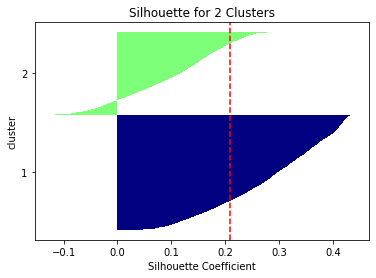

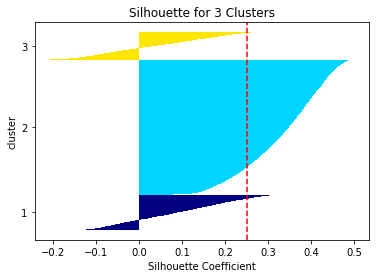

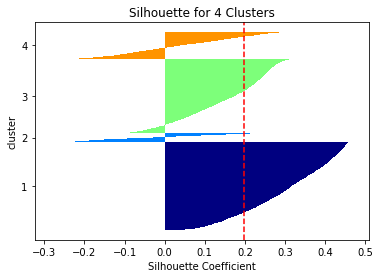

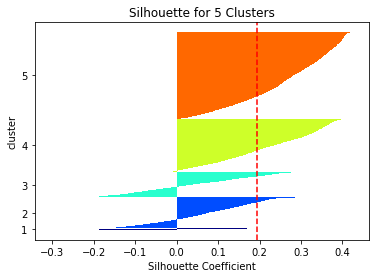

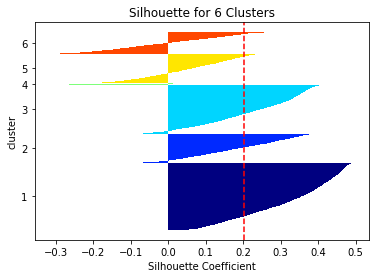

In [21]:
silh_samp_cluster(KMeans, data_imputed, stop=7)

Пока что высокая средняя инерция, низкие показатели силуэтов и очень большие колебания размеров участков силуэтов. Необходимо применить PCA для улучшения кластеризации.

## Извлечение функций с помощью PCA

### Метрики кластеризации

Теперь применим PCA для улучшения кластеризации. После извлечения элементов мы должны увидеть более низкую инерцию и более высокие оценки силуэтов.

In [35]:
# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(data_imputed)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x)
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.464924248807107        Inertia:  49682.9166825463
Silhouette-Score for 3 Clusters:  0.4520045992476249        Inertia:  33031.58010511934
Silhouette-Score for 4 Clusters:  0.4073670321078433        Inertia:  24544.281350307123
Silhouette-Score for 5 Clusters:  0.40110656909652276        Inertia:  19475.981383986164
Silhouette-Score for 6 Clusters:  0.3861262787462096        Inertia:  16223.992233269739

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3415167465810937        Inertia:  62044.7179631892
Silhouette-Score for 3 Clusters:  0.3800868671661458        Inertia:  46325.276957057315
Silhouette-Score for 4 Clusters:  0.36925772143899593        Inertia:  34659.68642452411
Silhouette-Score for 5 Clusters:  0.3682815127416017        Inertia:  28591.740284551437
Silhouette-Score for 6 Clusters:  0.33142664280067174        Inertia:  24847.646504278444

PCA with # of components:  4
Silhouette-Score for 2 Cl

Как видите, нам лучше всего подойдут 2 компонента PCA с 5-6 кластерами. Исходя их плотности кластеров, которые мы поличили при использование кластеризации KMeans

## Визуализация

## Иерархической кластеризации с помощью PCA (Birch)

Text(0, 0.5, 'PC2')

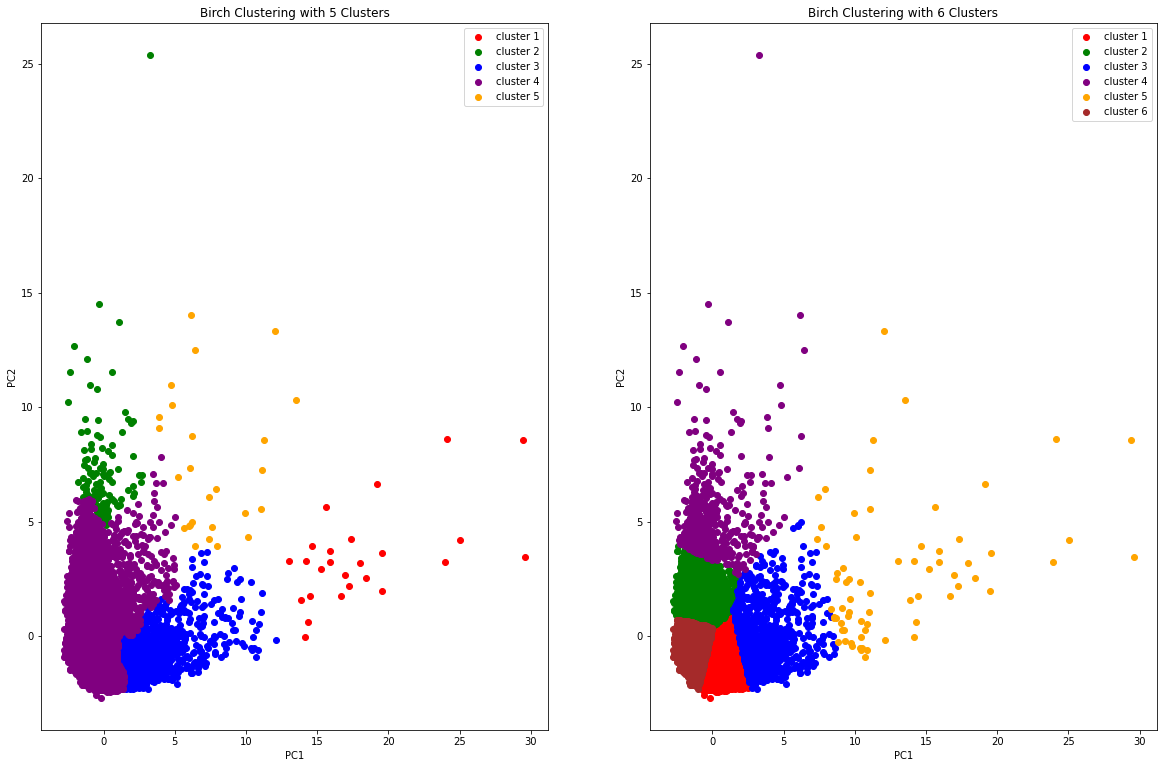

In [54]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(Birch(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize=(20, 13))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Birch Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Birch Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## Кластеризация k-средних c помощью PCA

Text(0, 0.5, 'PC2')

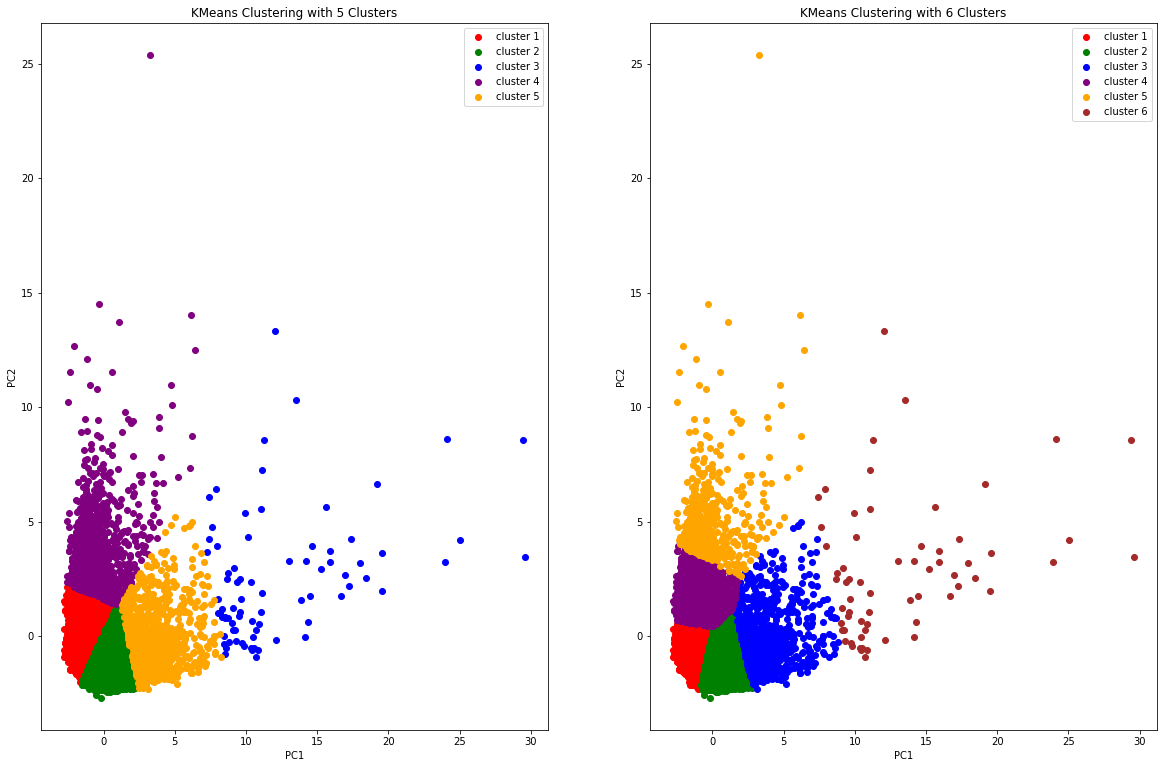

In [55]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize=(20, 13))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

До сих пор, применяя PCA, мы значительно улучшили модель KMeans. Попробуем и другие модели кластеризации!

## Агломеративная иерархическая кластеризация с помощью PCA

Text(0, 0.5, 'PC2')

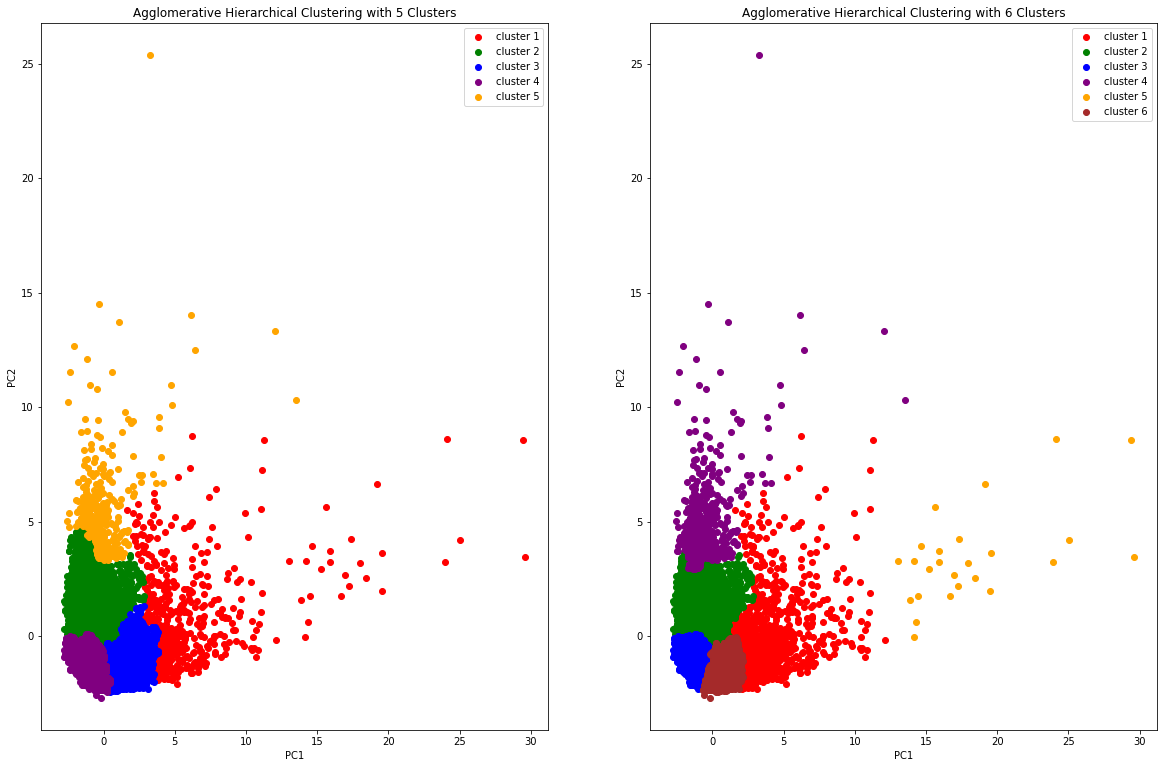

In [56]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize=(20, 13))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## Кластеризация гауссовой смеси с помощью PCA

Text(0, 0.5, 'PC2')

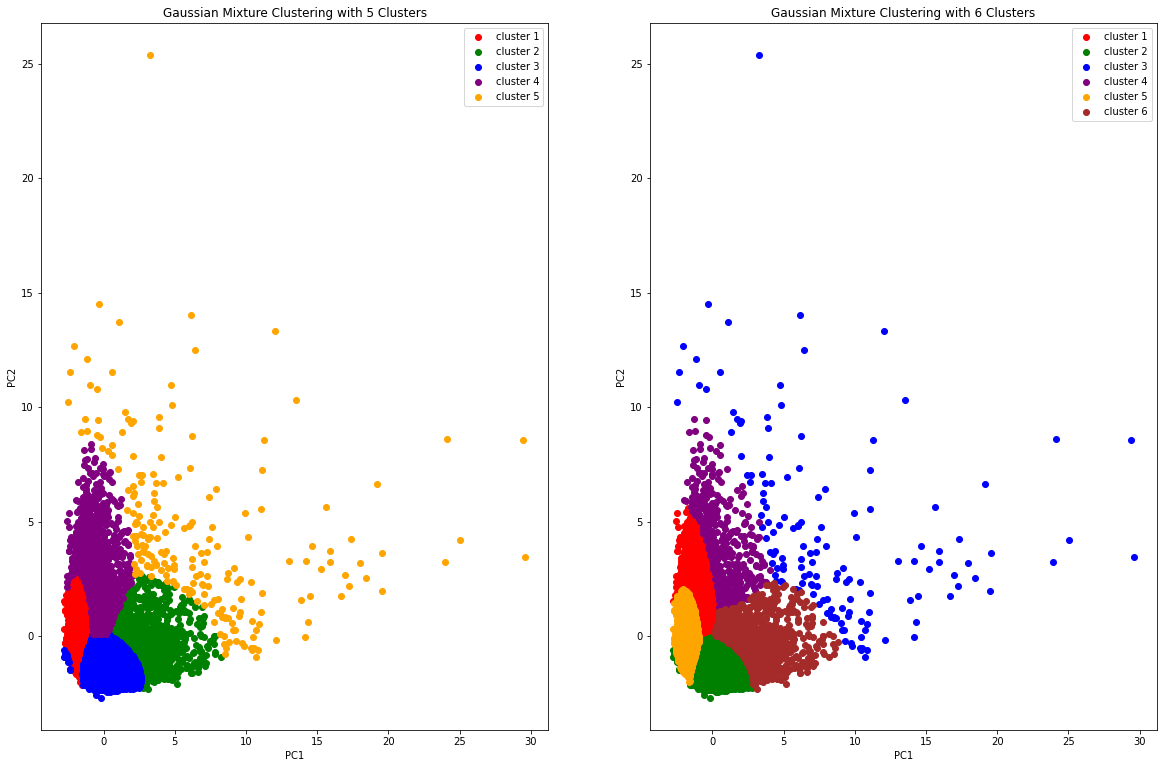

In [57]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize=(20, 13))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Gaussian Mixture Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Gaussian Mixture Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Исследовательский анализ данных

Мы выбираем 6 кластеров для этого EDA. Давайте создадим парный график Seaborn с выбранными / лучшими столбцами, чтобы показать, как кластеры сегментируют образцы:

In [58]:
# select best columns
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final = pd.DataFrame(data_imputed[best_cols])

print('New dataframe with best columns has just been created. Data shape: ' + str(data_final.shape))

New dataframe with best columns has just been created. Data shape: (8950, 6)


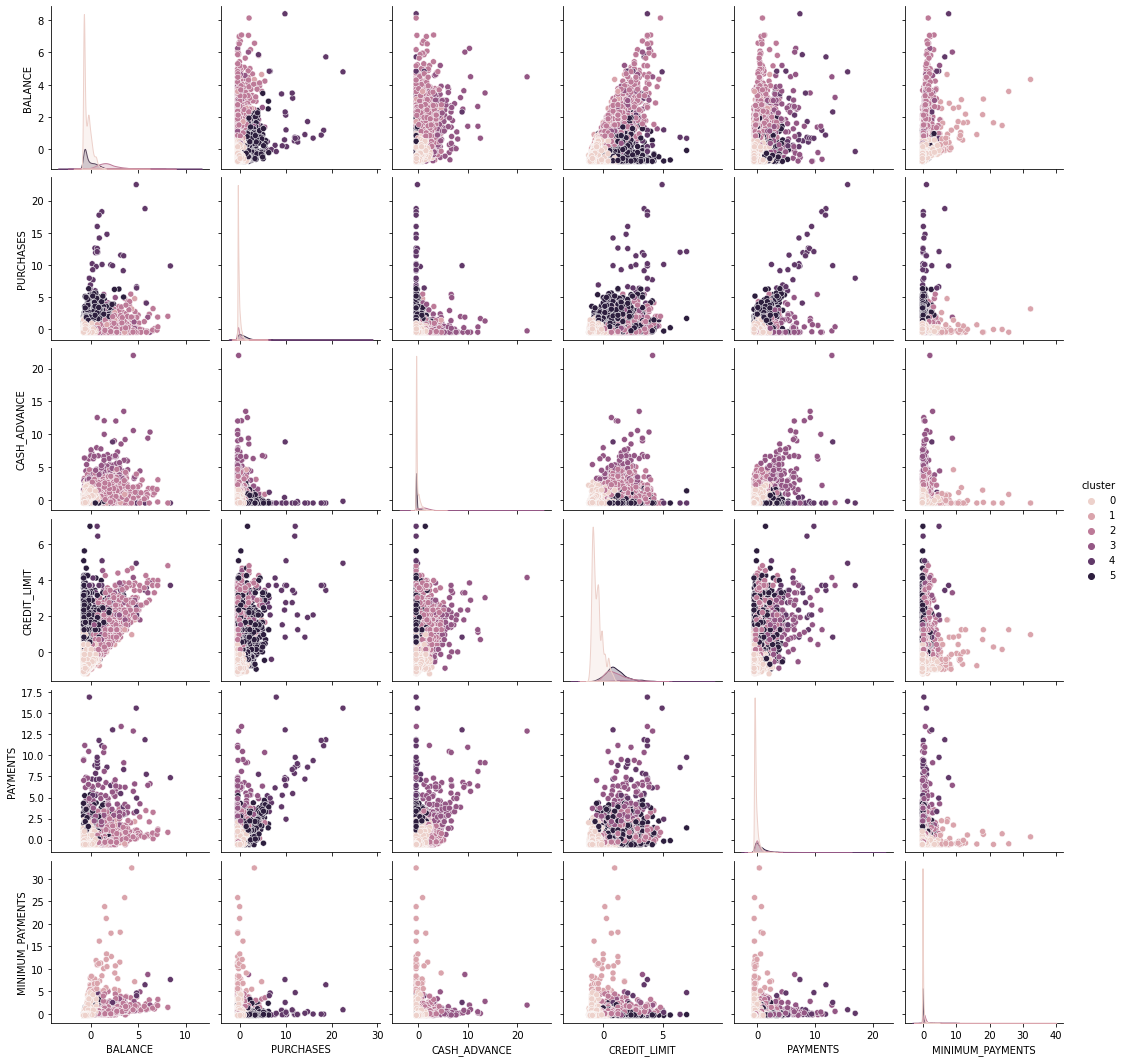

In [59]:
# apply KMeans clustering
alg = KMeans(n_clusters = 6)
label = alg.fit_predict(data_final)

# create a 'cluster' column
data_final['cluster'] = label
best_cols.append('cluster')

# make a Seaborn pairplot
sns.pairplot(data_final[best_cols], hue='cluster')

Мы можем увидеть некоторые интересные корреляции между функциями и кластерами, которые мы сделали выше. Перейдем к подробному анализу.

## Кластер 0 (синий): скромные пользователи

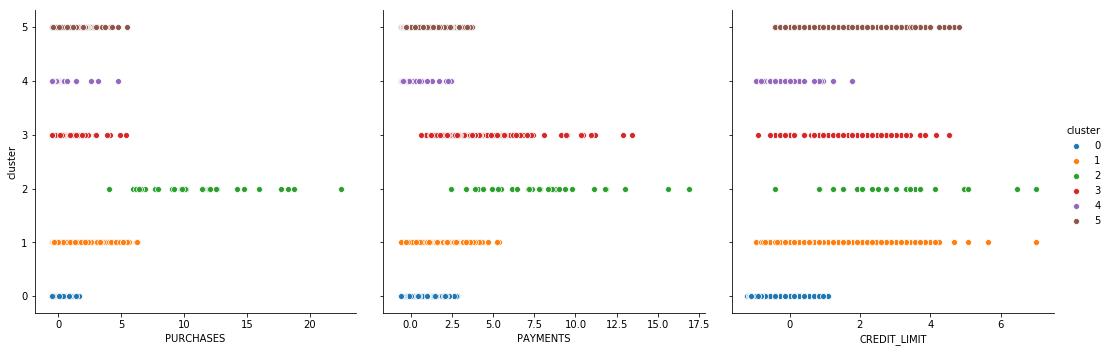

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'], y_vars=['cluster'], height=5, aspect=1)

Эта группа пользователей, хотя и насчитывает наибольшее количество пользователей, довольно экономна: у них самые низкие покупки, вторые по величине платежи и самый низкий кредитный лимит. Банк не получит большой прибыли от этой группы, поэтому должна быть какая-то стратегия для большего привлечения этих людей.

## Кластер 1 (оранжевый): активные пользователи

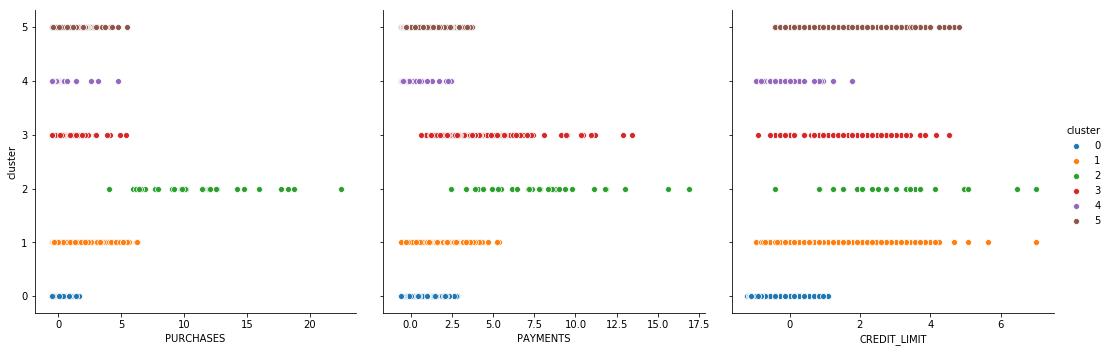

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'], y_vars=['cluster'], height=5, aspect=1)

Эта группа пользователей в целом очень активна: у них вторые по величине покупки, третьи по величине платежи и самые разные значения кредитного лимита. Этот тип пользователей кредитных карт - это тот тип, на который вам следует тратить минимум времени и усилий, поскольку они уже являются идеальным вариантом.

## Кластер 2 (зеленый): богатые пользователи

Большие траты. Эта группа, безусловно, наиболее интересна для анализа, поскольку у них не только наибольшее количество покупок, наибольшие выплаты, наибольшие минимальные выплаты, но и другие характеристики также сильно различаются по значениям. Давайте быстро посмотрим на парные графики.

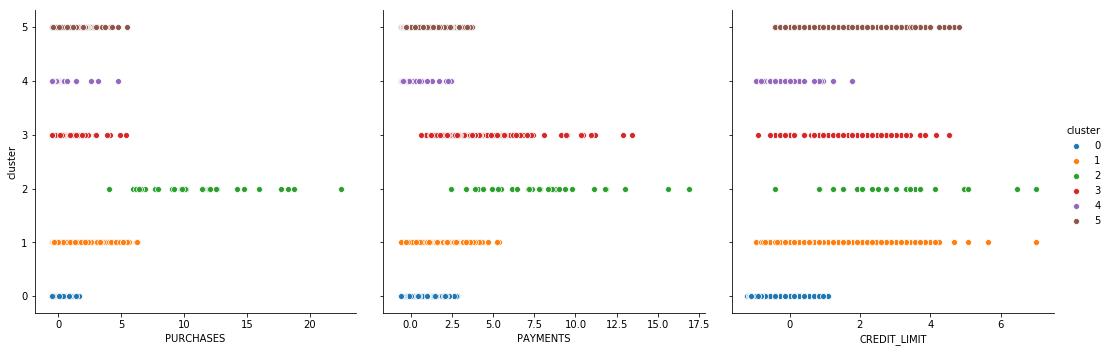

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'], y_vars=['cluster'], height=5, aspect=1)

По своей природе «крупных спонсоров» в этом кластере есть много выбросов: люди, у которых / имеют ненормально высокий баланс, покупки, ссуды наличными и платежи. График ниже даст вам представление о том, насколько сильно отличается этот кластер - почти все зеленые точки являются выбросами по сравнению с остальной частью всего набора данных.

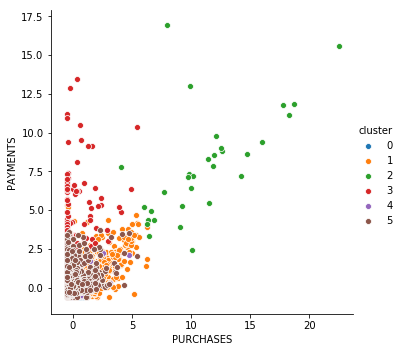

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES'], y_vars=['PAYMENTS'], height=5, aspect=1)

## Кластер 3 (красный): заемщики денег

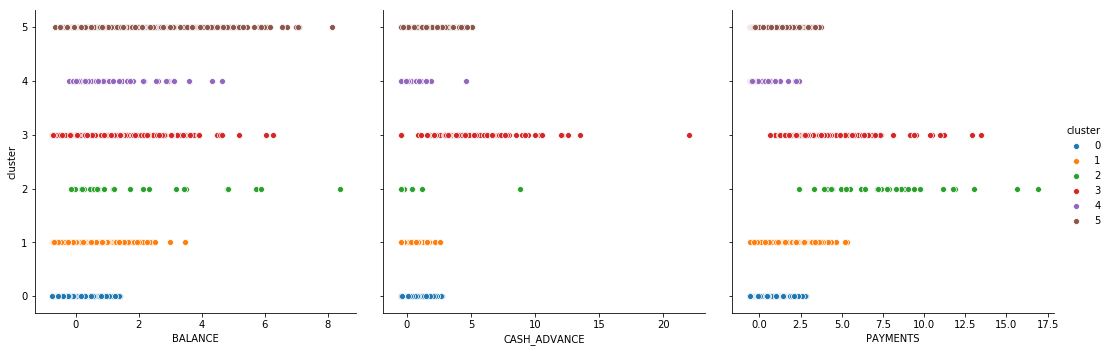

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['BALANCE', 'CASH_ADVANCE', 'PAYMENTS'], y_vars=['cluster'], height=5, aspect=1)

Дико разнообразный баланс, вторые по величине выплаты, средние покупки. Особенностью этого кластера является то, что у этих людей самый высокий аванс наличными на сегодняшний день - есть даже один крайний случай, когда он имеет около 25 пунктов выдачи наличных. Мы называем этих людей «Заемщиками».

## Кластер 4 (фиолетовый): люди с высоким риском

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['MINIMUM_PAYMENTS'], y_vars=['CREDIT_LIMIT'], height=5, aspect=1)

Эта группа имеет абсурдно высокие минимальные платежи и второй по величине кредитный лимит. Похоже, банк определил их как более рискованные.

## Кластер 5 (коричневый)

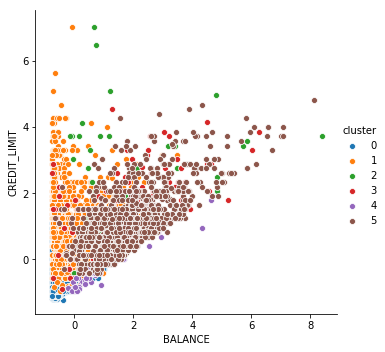

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['BALANCE'], y_vars=['CREDIT_LIMIT'],
            height=5, aspect=1)

Эту группу сложно проанализировать и разработать хорошую маркетинговую стратегию, поскольку их кредитный лимит и балансовая стоимость сильно различаются. Как видите, график выше выглядит так, будто половина его была сделана из коричневого цвета!

# Вывод

Мы многому научились из этого набора данных, сегментируя клиентов на шесть меньших групп: средний пользователь, активные пользователи, крупные спонсоры, заемщики денег, лица с высоким риском и подстановочные знаки. Чтобы завершить этот кластерный анализ, давайте подведем итог тому, что мы узнали, и некоторым возможным маркетинговым стратегиям: <br>
* Обычный Джо не часто пользуется кредитными картами в повседневной жизни. У них средние финансы и низкие долги. Хотя поощрение этих людей к использованию кредитных карт необходимо для получения прибыли компании, следует также учитывать этику ведения бизнеса и социальную ответственность. <br>
* Определите активных клиентов, чтобы применить к ним правильную маркетинговую стратегию. Эти люди - основная группа, на которой мы должны сосредоточиться. <br>
* Некоторые люди просто плохо умеют управлять финансами - например, Заемщики. К этому нельзя относиться легкомысленно. <br>
* Несмотря на то, что в настоящее время мы хорошо справляемся с рисками, предоставляя им низкие кредитные лимиты, следует рассмотреть дополнительные маркетинговые стратегии, ориентированные на эту группу клиентов. <br>

В этом проекте мы выполнили предварительную обработку данных, извлечение признаков с помощью PCA, изучили различные метрики кластеризации (инерции, оценки силуэтов), экспериментировали с различными алгоритмами <br>кластеризации (KMeans Clustering, Agglomerative Hierarchical Clustering, Gaussian Mixture Clustering), визуализацией данных и бизнесом, аналитикой.